In [1]:
import pandas as pd
import numpy as np
import os
import subprocess
import matplotlib.pyplot as plt

In [2]:
# defining folders
notebook_path = os.path.realpath(os.getcwd())
root_dir_path = os.path.dirname(notebook_path)
code_path = os.path.join(root_dir_path, 'VirtuousMultiTaste')
data_path = os.path.join(root_dir_path, 'data')
test_path = os.path.join(notebook_path, 'test')

## TEST

In [3]:
# files used for training and test
test_file = data_path + os.sep + 'testing_dataset_fourtaste_problem.csv'
train_file = data_path + os.sep + 'training_dataset_fourtaste_problem.csv'

In [4]:
train_DB = pd.read_csv(train_file, sep='\t', header=0)
train_DB.Parent_SMILES.to_csv(test_path + os.sep + 'train_DB.txt', index=False, header=False)

# replace 'Tasteless' with 'Other' in the taste field to match the predictions labels
train_DB['Taste'] = train_DB['Taste'].replace('Tasteless', 'Other')

test_DB = pd.read_csv(test_file, sep='\t', header=0)
test_DB.Parent_SMILES.to_csv(test_path + os.sep + 'test_DB.txt', index=False, header=False)

# replace 'Tasteless' with 'Other' in the taste field
test_DB['Taste'] = test_DB['Taste'].replace('Tasteless', 'Other')

In [5]:
test_DB.head()

,Unnamed: 0,Taste,Std_SMILES,Parent_SMILES,SEQUENCE
0,0,Other,COc1cc(CCC(=O)c2c(O)cccc2O)ccc1O,COc1cc(CCC(=O)c2c(O)cccc2O)ccc1O,NaN
1,1,Bitter,O=C(/C=C/c1ccccc1)c1ccc(O)cc1,O=C(/C=C/c1ccccc1)c1ccc(O)cc1,NaN
2,2,Sweet,CC(C)(Cc1ccccc1)NC(=O)C(N)CC(=O)O,CC(C)(Cc1ccccc1)NC(=O)C(N)CC(=O)O,NaN
3,3,Sweet,CC(C)=CCCC(C)(O)C1CC(O)C(C)=CC1=O,CC(C)=CCCC(C)(O)C1CC(O)C(C)=CC1=O,NaN
4,4,Sweet,CC(=O)c1ccc2ccccc2c1,CC(=O)c1ccc2ccccc2c1,NaN


In [6]:
# run the code (un commment to run)
#subprocess.call(['python', code_path + os.sep + 'VirtuousMultiTaste.py', '-f', test_path + os.sep + 'train_DB.txt', '-d', 'test/train_output'])
#subprocess.call(['python', code_path + os.sep + 'VirtuousMultiTaste.py', '-f', test_path + os.sep + 'test_DB.txt', '-d', 'test/test_output'])

/Users/lorenzo/opt/anaconda3/envs/VIRTUOUS/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=14)]: Done   2 tasks      | elapsed:    4.7s
[Parallel(n_jobs=14)]: Done   3 tasks      | elapsed:    4.7s
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:    4.7s
[Parallel(n_jobs=14)]: Done   5 tasks      | elapsed:    4.7s
[Parallel(n_jobs=14)]: Done   6 tasks      | elapsed:    4.7s
[Parallel(n_jobs=14)]: Done   7 tasks      | elapsed:    4.7s
[Parallel(n_jobs=14)]: Done   8 tasks      | elapsed:    4.7s
[Parallel(n_jobs=14)]: Done   9 tasks      | elapsed:    4.7s
[Parallel(n_jobs=14)]: Done  10 tasks      | elapsed:    4.7s
[Parallel(n_jobs=14)]: Done  11 tasks      | elapsed:    4.7s
[Parallel(n_jobs=14)]: Done  12 t

0

In [7]:
# read prediciton file 
dominant_file_train =  test_path + os.sep + 'train_output' + os.sep + 'result_dominant_label.txt'
dominant_file_test  =  test_path + os.sep + 'test_output' + os.sep + 'result_dominant_label.txt'

In [8]:
# true values
true_values_train = train_DB.Taste
true_values_test  = test_DB.Taste
predicted_values_train = np.loadtxt(dominant_file_train, dtype=str, delimiter='\t')
predicted_values_test  = np.loadtxt(dominant_file_test, dtype=str, delimiter='\t')
predicted_values_train = [i[0] for i in predicted_values_train]
predicted_values_test  = [i[0] for i in predicted_values_test]

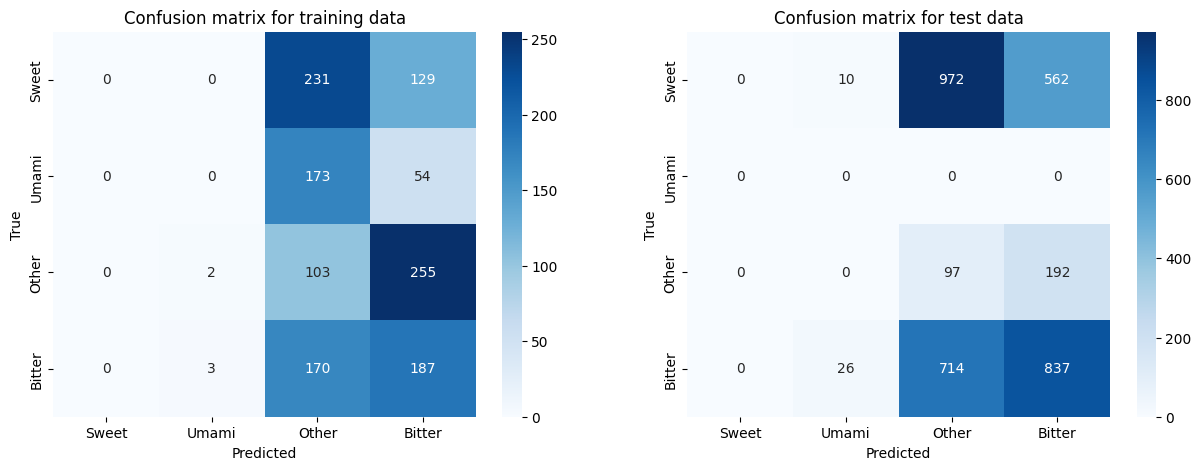

In [9]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# confusion matrix for training data
cm_train = confusion_matrix(true_values_train, predicted_values_train, labels=['Sweet', 'Umami', 'Other', 'Bitter'])
cm_train = pd.DataFrame(cm_train, columns=['Sweet', 'Umami', 'Other', 'Bitter'], index=['Sweet', 'Umami', 'Other', 'Bitter'])
cm_train

# confusion matrix for test data
cm_test = confusion_matrix(true_values_test, predicted_values_test , labels=['Sweet', 'Umami', 'Other', 'Bitter'])
cm_test = pd.DataFrame(cm_test, columns=['Sweet', 'Umami', 'Other', 'Bitter'], index=['Sweet', 'Umami', 'Other', 'Bitter'])
cm_test

# plot confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(cm_train, annot=True, ax=ax[0], cmap='Blues', fmt='g')
ax[0].set_title('Confusion matrix for training data')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')
sns.heatmap(cm_test, annot=True, ax=ax[1], cmap='Blues', fmt='g')
ax[1].set_title('Confusion matrix for test data')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')
plt.show()

In [10]:
# create classification report
from sklearn.metrics import classification_report
# classification report for training data
print ('****************************************************************************************')
print ('Classification report for TRAINING data')
print(classification_report(true_values_train, predicted_values_train))
# classification report for test data
print ('****************************************************************************************')
print ('Classification report for TEST data')
print(classification_report(true_values_test, predicted_values_test))

****************************************************************************************
Classification report for TRAINING data
              precision    recall  f1-score   support

      Bitter       0.30      0.52      0.38       360
       Other       0.15      0.29      0.20       360
       Sweet       0.00      0.00      0.00       360
       Umami       0.00      0.00      0.00       227

    accuracy                           0.22      1307
   macro avg       0.11      0.20      0.14      1307
weighted avg       0.12      0.22      0.16      1307

****************************************************************************************
Classification report for TEST data
              precision    recall  f1-score   support

      Bitter       0.53      0.53      0.53      1577
       Other       0.05      0.34      0.09       289
       Sweet       0.00      0.00      0.00      1544
       Umami       0.00      0.00      0.00         0

    accuracy                           

/Users/lorenzo/opt/anaconda3/envs/VIRTUOUS/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lorenzo/opt/anaconda3/envs/VIRTUOUS/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lorenzo/opt/anaconda3/envs/VIRTUOUS/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Dataset Lampros

In [43]:
test_DB_Lampros = pd.read_csv(data_path + os.sep + 'Preprocessed_Lampros/testing_dataset_statisticalSignificant_ChemTaste.txt', sep='\t', header=0)
train_DB_Lampros = pd.read_csv(data_path + os.sep + 'Preprocessed_Lampros/training_dataset_statisticalSignificant_ChemTaste.txt', sep='\t', header=0)
test_DB_Lampros_labels = np.loadtxt(data_path + os.sep + 'Preprocessed_Lampros/testing_dataset_labels_statisticalSignificant_ChemTaste.txt', dtype=str, delimiter='\t')
train_DB_Lampros_labels = np.loadtxt(data_path + os.sep + 'Preprocessed_Lampros/training_dataset_labels_statisticalSignificant_ChemTaste.txt', dtype=str, delimiter='\t')

In [39]:
# run the prediction
os.chdir(test_path +  os.sep + 'Lampros')
#subprocess.run(['python', code_path + os.sep + 'testing_fourtaste.py', data_path + os.sep + 'Preprocessed_Lampros/testing_dataset_statisticalSignificant_ChemTaste.txt' ])
#subprocess.run(['mv', test_path + os.sep + 'Lampros/Output_*', test_path + os.sep + 'Lampros/test_output_Lampros'], shell=True)
#subprocess.run(['python', code_path + os.sep + 'testing_fourtaste.py', data_path + os.sep + 'Preprocessed_Lampros/training_dataset_statisticalSignificant_ChemTaste.txt' ])
#subprocess.run(['mv', test_path + os.sep + 'Lampros/Output_*', test_path + os.sep + 'Lampros/train_output_Lampros'], shell=True)


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=14)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=14)]: Done   3 tasks      | elapsed:    2.4s
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:    2.4s
[Parallel(n_jobs=14)]: Done   5 tasks      | elapsed:    2.4s
[Parallel(n_jobs=14)]: Done   6 tasks      | elapsed:    2.4s
[Parallel(n_jobs=14)]: Done   7 tasks      | elapsed:    2.4s
[Parallel(n_jobs=14)]: Done   8 tasks      | elapsed:    2.4s
[Parallel(n_jobs=14)]: Done   9 tasks      | elapsed:    2.5s
[Parallel(n_jobs=14)]: Done  10 tasks      | elapsed:    2.5s
[Parallel(n_jobs=14)]: Done  11 tasks      | elapsed:    2.5s
[Parallel(n_jobs=14)]: Done  12 tasks      | elapsed:    2.5s
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:    2.6s
[Parallel(n_jobs=14)]: Done  14 tasks      | elapsed:    2.6s
[Parallel(n_jobs=14)]: Done  15 tasks      | elapsed:  

CompletedProcess(args=['python', '/Users/lorenzo/Documents/GitHub/VirtuousMultiTaste/VirtuousMultiTaste/testing_fourtaste.py', '/Users/lorenzo/Documents/GitHub/VirtuousMultiTaste/data/Preprocessed_Lampros/training_dataset_statisticalSignificant_ChemTaste.txt'], returncode=0)

In [44]:
# read prediciton file 
dominant_file_test_L =  test_path + os.sep + 'Lampros/test_output_Lampros' + '/result_dominant_label.txt'
dominant_file_train_L =  test_path + os.sep + 'Lampros/train_output_Lampros' + '/result_dominant_label.txt'

In [45]:
# true values
true_values_test  = test_DB_Lampros_labels
true_values_train = train_DB_Lampros_labels
predicted_values_test  = np.loadtxt(dominant_file_test_L, dtype=str, delimiter='\t')
predicted_values_train = np.loadtxt(dominant_file_train_L, dtype=str, delimiter='\t')
predicted_values_test  = [i[0] for i in predicted_values_test]
predicted_values_train = [i[0] for i in predicted_values_train]

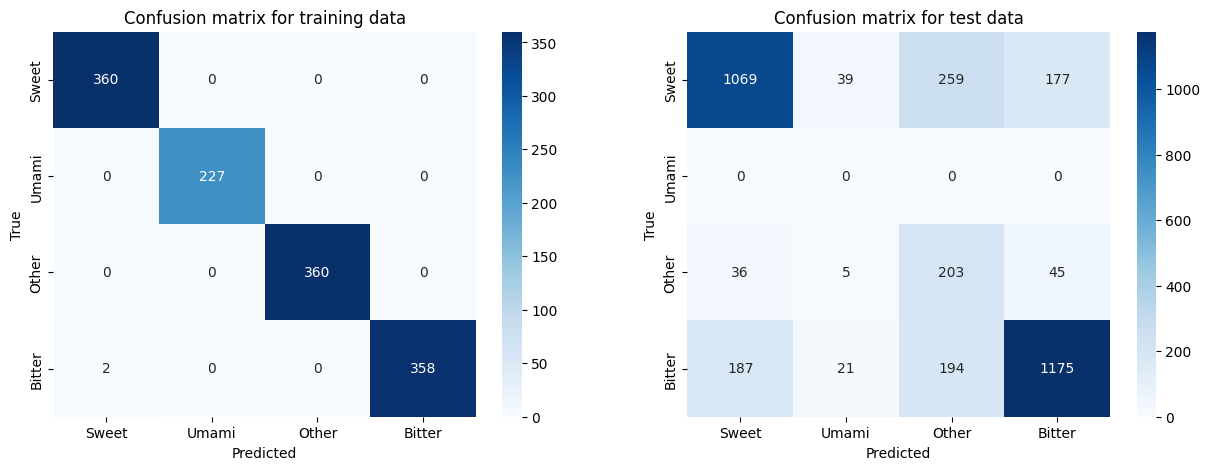

In [46]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# confusion matrix for training data
cm_train = confusion_matrix(true_values_train, predicted_values_train, labels=['Sweet', 'Umami', 'Other', 'Bitter'])
cm_train = pd.DataFrame(cm_train, columns=['Sweet', 'Umami', 'Other', 'Bitter'], index=['Sweet', 'Umami', 'Other', 'Bitter'])
cm_train

# confusion matrix for test data
cm_test = confusion_matrix(true_values_test, predicted_values_test , labels=['Sweet', 'Umami', 'Other', 'Bitter'])
cm_test = pd.DataFrame(cm_test, columns=['Sweet', 'Umami', 'Other', 'Bitter'], index=['Sweet', 'Umami', 'Other', 'Bitter'])
cm_test

# plot confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(cm_train, annot=True, ax=ax[0], cmap='Blues', fmt='g')
ax[0].set_title('Confusion matrix for training data')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')
sns.heatmap(cm_test, annot=True, ax=ax[1], cmap='Blues', fmt='g')
ax[1].set_title('Confusion matrix for test data')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')
plt.show()

In [47]:
# create classification report
from sklearn.metrics import classification_report
# classification report for training data
print ('****************************************************************************************')
print ('Classification report for TRAINING data')
print(classification_report(true_values_train, predicted_values_train))
# classification report for test data
print ('****************************************************************************************')
print ('Classification report for TEST data')
print(classification_report(true_values_test, predicted_values_test))

****************************************************************************************
Classification report for TRAINING data
              precision    recall  f1-score   support

      Bitter       1.00      0.99      1.00       360
       Other       1.00      1.00      1.00       360
       Sweet       0.99      1.00      1.00       360
       Umami       1.00      1.00      1.00       227

    accuracy                           1.00      1307
   macro avg       1.00      1.00      1.00      1307
weighted avg       1.00      1.00      1.00      1307

****************************************************************************************
Classification report for TEST data
              precision    recall  f1-score   support

      Bitter       0.84      0.75      0.79      1577
       Other       0.31      0.70      0.43       289
       Sweet       0.83      0.69      0.75      1544
       Umami       0.00      0.00      0.00         0

    accuracy                           

/Users/lorenzo/opt/anaconda3/envs/VIRTUOUS/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lorenzo/opt/anaconda3/envs/VIRTUOUS/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lorenzo/opt/anaconda3/envs/VIRTUOUS/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

### Total performance

In [91]:
# calculate performance
from sklearn.metrics import accuracy_score, f1_score, fbeta_score, precision_score, recall_score, auc   

test_performance = pd.DataFrame()
test_performance ['Set'] = ['TRAINING', 'TEST']
test_performance ['Accuracy'] = [accuracy_score(true_values_train, predicted_values_train).round(4)*100,accuracy_score(true_values_test, predicted_values_test).round(4)*100]
test_performance ['F1'] = [f1_score(true_values_train, predicted_values_train, average='weighted').round(4)*100,f1_score(true_values_test, predicted_values_test, average='weighted').round(4)*100]
test_performance ['F2'] = [fbeta_score(true_values_train, predicted_values_train, average='weighted', beta=2).round(4)*100,fbeta_score(true_values_test, predicted_values_test, average='weighted', beta=2).round(4)*100]
test_performance ['Precision'] = [precision_score(true_values_train, predicted_values_train, average='weighted').round(4)*100,precision_score(true_values_test, predicted_values_test, average='weighted').round(4)*100]
test_performance ['Recall'] = [recall_score(true_values_train, predicted_values_train, average='weighted').round(4)*100,recall_score(true_values_test, predicted_values_test, average='weighted').round(4)*100]
test_performance


/Users/lorenzo/opt/anaconda3/envs/VIRTUOUS/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Set,Accuracy,F1,F2,Precision,Recall
0,TRAINING,99.85,99.85,99.85,99.85,99.85
1,TEST,71.76,74.32,72.42,78.98,71.76


### Performance per taste

In [127]:
#calculate accuracy for each class for the test data
df = pd.DataFrame()
df['True'] = true_values_test
df['Predicted'] = predicted_values_test

tastes = df['True'].unique()
accuracy = []
f1 = []
f2 = []
precision = []
recall = []
AUC = []

for i in df['True'].unique():

    df2 = df.copy()
    # convert to binary (sweet vs not sweet, umami vs not umami, bitter vs not bitter, other vs not other)
    df2['True'] = df2['True'].apply(lambda x: 1 if x == i else 0)
    df2['Predicted'] = df2['Predicted'].apply(lambda x: 1 if x == i else 0)

    # calculate accuracy, f1, f2, precision, recall and AUC for the test data
    accuracy.append(accuracy_score(df2.iloc[:,0], df2.iloc[:,1]).round(4)*100)
    f1.append(f1_score(df2.iloc[:,0], df2.iloc[:,1], average='weighted').round(4)*100)
    f2.append(fbeta_score(df2.iloc[:,0], df2.iloc[:,1], average='weighted', beta=2).round(4)*100)
    precision.append(precision_score(df2.iloc[:,0], df2.iloc[:,1], average='weighted').round(4)*100)
    recall.append(recall_score(df2.iloc[:,0], df2.iloc[:,1], average='weighted').round(4)*100)

performance_tastes = pd.DataFrame()
performance_tastes['Taste'] = df['True'].unique()
performance_tastes['Accuracy'] = accuracy
performance_tastes['F1'] = f1
performance_tastes['F2'] = f2
performance_tastes['Precision'] = precision
performance_tastes['Recall'] = recall
performance_tastes = performance_tastes.iloc[[0,2,1],:]
performance_tastes 

,Taste,Accuracy,F1,F2,Precision,Recall
0,Bitter,81.70,81.58,81.60,81.92,81.70
2,Sweet,79.53,79.27,79.32,79.91,79.53
1,Other,84.19,86.77,84.87,91.29,84.19


## BitterDB test

In [6]:
BitterDB_file = '/Users/lorenzo/Dropbox (Politecnico Di Torino Studenti)/VIRTUOUS/data/00-OriginalTasteDBs/00-orignalDBs/BitterDB/BitterDB_original.csv'
BitterDB = pd.read_csv(BitterDB_file, sep=',', header=0)
BitterDB.canonical_smiles.to_csv(test_path + os.sep + 'BitterDB.txt', index=False, header=False)

In [7]:
# run the code (un commment to run)
subprocess.call(['python', code_path + os.sep + 'VirtuousMultiTaste.py', '-f', test_path + os.sep + 'BitterDB.txt', '-d', 'test/BitterDB_output'])

/Users/lorenzo/opt/anaconda3/envs/VIRTUOUS/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=14)]: Done   2 tasks      | elapsed:    3.5s
[Parallel(n_jobs=14)]: Done   3 tasks      | elapsed:    3.5s
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:    3.5s
[Parallel(n_jobs=14)]: Done   5 tasks      | elapsed:    3.5s
[Parallel(n_jobs=14)]: Done   6 tasks      | elapsed:    3.5s
[Parallel(n_jobs=14)]: Done   7 tasks      | elapsed:    3.5s
[Parallel(n_jobs=14)]: Done   8 tasks      | elapsed:    3.5s
[Parallel(n_jobs=14)]: Done   9 tasks      | elapsed:    3.5s
[Parallel(n_jobs=14)]: Done  10 tasks      | elapsed:    3.5s
[Parallel(n_jobs=14)]: Done  11 tasks      | elapsed:    3.5s
[Parallel(n_jobs=14)]: Done  12 t

0

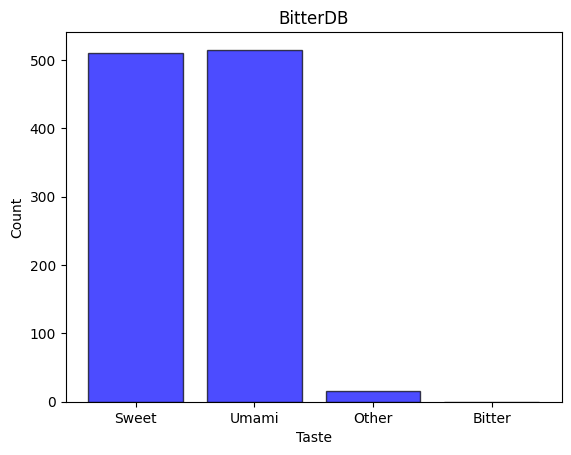

In [8]:
dominant_file_bitter  =  test_path + os.sep + 'BitterDB_output' + os.sep + 'result_dominant_label.txt'
predicted_values_bitter  = np.loadtxt(dominant_file_bitter, dtype=str, delimiter='\t')
predicted_values_bitter = [i[0] for i in predicted_values_bitter]

# plot as histogram
plt.hist(predicted_values_bitter, bins=[0,1,2,3,4], color='blue', edgecolor='black', alpha=0.7, rwidth=0.8, align='mid')
plt.title('BitterDB')
plt.xlabel('Taste')
plt.ylabel('Count')

# center xticks on the bins
plt.xticks([0.5, 1.5, 2.5, 3.5], ['Sweet', 'Umami', 'Other', 'Bitter'])
plt.show()


In [9]:
print ('Bitter: %s' %predicted_values_bitter.count('Bitter'))
print ('Sweet: %s' %predicted_values_bitter.count('Sweet'))
print ('Umami: %s' %predicted_values_bitter.count('Umami'))
print ('Other: %s' %predicted_values_bitter.count('Other'))

Bitter: 510
Sweet: 0
Umami: 16
Other: 515
